In [2]:
%config Completer.use_jedi=False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [21]:
class Bootstrap:
    '''
    Basic statistics tests using bootstraping.
    
    Attributes
    ----------
    data_1 : 1d numpy ndarray or pandas Series
        
    data_2 : 1d numpy ndarray or pandas Series (optional)
        
    Methods
    -------
    one_sample_test(one_sample_mean, size=1000, alternative='two-sided')
        Calculate p-value comparing data_1 sample to given mean value.
        
    two_sample_test(size=1000, alternative='two-sided')
        Calculate p-value comparing data_1 and data_2 mean values.
        
    permutation_test(size=1000, alternative='two-sided')
        Calculate p-value comparing data_1 and data_2 mean values.
    '''
    
    def __init__(self, _data_1, _data_2=np.empty(0)):
        
        # here is a place for the proper code that is yet to be added
        # as of now pd.Series data types will not work properly or at all.
        # also the part for dealing with nans based on imputing method should be added
        # add code for checking if all modules are imported:
            # import sys
            # modulename = 'datetime'
            # if modulename not in sys.modules:
            #     print(f'You have not imported the {modulename} module')
        
        # add more statistical tests, like chi2 or F-test for anova based on bootstrap
        
        # 'alternative' parameter wokrs okey, but 'less' and 'greater' should be added
        # as the methods will always try to get more extreme values to calculate one-sided p_value
        
        # add descriptions for methods
        
        self._data = [_data_1, _data_2]
        
        
    def one_sample_test(self, one_sample_mean, size=1000, alternative='two-sided'):
            
        # if data_2 is present extract only data_1
        if self._data[1].size != 0:
            self._data = self._data[0]
        else:
            d = self._data[0]
        
        # transform the data
        # dost = data_one_sample_transformed
        dost = d - np.mean(d) + one_sample_mean
        
        # sample from the data
        bs_dost = np.random.choice(dost, size=(dost.shape[0], size)).mean(axis=0)
        
        # store the result in self
        self.bs_one_sample_ = bs_dost
        
        # calculate p-value
        if bs_dost.mean() < d.mean():
            self.one_sample_pval_ = (bs_dost >= d.mean()).sum() / bs_dost.shape[0]
        else:
            self.one_sample_pval_ = (bs_dost <= d.mean()).sum() / bs_dost.shape[0]
        
        # return p-value
        if alternative == 'two-sided':
            return 2 * self.one_sample_pval_
        else:
            return self.one_sample_pval_
    
    def two_sample_test(self, size=1000, alternative='two-sided'):
        
        # extract the data into easily manageable variables
        if self._data[1].size == 0:
            raise ValueError('Second data sample is empty.')
        else:
            d_1 = self._data[0]
            d_2 = self._data[1]
        
        # store the value of difference between sample means
        diff_obs = d_1.mean() - d_2.mean()
        
        # concatenate the data samples and calculate the mean
        # cdsm  = concatenated_data_samples_mean
        cdsm = np.concatenate([d_1, d_2]).mean()
        
        # transform the data samples to have the value of mean equal to cdsm
        # tds_i = transformed_data_sample_i
        tds_1 = d_1 - d_1.mean() + cdsm
        tds_2 = d_2 - d_2.mean() + cdsm
        
        # bootstrap mean values from the tds_i and store it
        # bsm_i = bootstrap_mean_i
        bsm_1 = np.random.choice(tds_1, size=(tds_1.shape[0], size)).mean(axis=0)
        bsm_2 = np.random.choice(tds_2, size=(tds_2.shape[0], size)).mean(axis=0)
            
        # store the differences
        # bsmd = bootstrap_mean_difference
        bsmd = bsm_1 - bsm_2
            
        # store bsmd in self
        self.bs_two_sample_diff_ = bsmd
        
        # calculate p-value
        if bsmd.mean() < diff_obs:
            self.two_sample_pval_ = (bsmd >= diff_obs).sum() / bsmd.shape[0]
        else:
            self.two_sample_pval_ = (bsmd <= diff_obs).sum() / bsmd.shape[0]
            
        # return p-value
        if alternative == 'two-sided':
            return 2 * self.two_sample_pval_
        else:
            return self.two_sample_pval_
        
    def permutation_test(self, size=1000, alternative='two-sided'):
        
        
        if self._data[1].size == 0:
            raise ValueError('Second data sample is empty.')
        else:
            d_1 = self._data[0]
            d_2 = self._data[1]
            
        # calculate the observable mean difference between two samples
        diff_obs = d_1.mean() - d_2.mean()
        
        # concatenate the samples
        # cds = concatenated_data_samples
        cds = np.concatenate([d_1, d_2])
        
        # permutate and separate the data into two sets
        # then calculate the difference between means and store the values
        # pmd = permutated_mean_difference
        pmd = np.empty(size)
        
        #### THIS IS THE WAY TO DO IT
        # perm_data = np.array([np.random.permutation(con) for _ in range(10000)])
        ####
        
        for i in range(size):
            # permutate the cds set
            perm = np.random.permutation(cds)
            
            # separate
            perm_reshaped = perm.reshape(-1, 2) # <--- it only supports arrays of the same shape, that can be split in half
            
            # calculate and store the difference in means         
            pmd[i] = np.diff(perm_reshaped.mean(axis=0))
            
        # store the differences
        self.bs_permutation_diff_ = pmd
        
        # calculate p-value
        if pmd.mean() < diff_obs:
            self.permutation_pval_ = (pmd >= diff_obs).sum() / pmd.size
        else:
            self.permutation_pval_ = (pmd <= diff_obs).sum() / pmd.size
            
        # return p-value
        if alternative == 'two-sided':
            return 2 * self.permutation_pval_
        else:
            return self.permutation_pval_

In [15]:
from scipy.stats import ttest_1samp
da_1 = np.random.normal(0, 0.1, size=100)
bs = Bootstrap(da_1)
print(bs.one_sample_test(0, size=1000), ttest_1samp(da_1, 0)[1])

0.76 0.7490390964087045


0.684 0.694875063044712


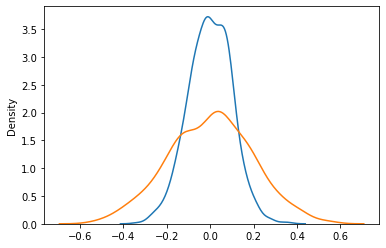

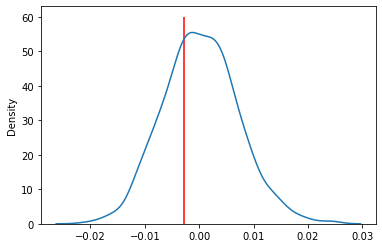

In [16]:
from scipy.stats import ttest_ind
da_1 = np.random.normal(0, 0.1, size=1000)
da_2 = np.random.normal(0.001, 0.2, size=1000)
bs = Bootstrap(da_1, da_2)
print(bs.two_sample_test(size=1000), ttest_ind(da_1, da_2)[1])

sns.kdeplot(da_1)
sns.kdeplot(da_2)
plt.figure()
g = da_1.mean() - da_2.mean()
k = bs.bs_two_sample_diff_
sns.kdeplot(k)
plt.vlines(g, 0, plt.yticks()[0][-1], color='red')

0.114 0.12190779080782345 0.096


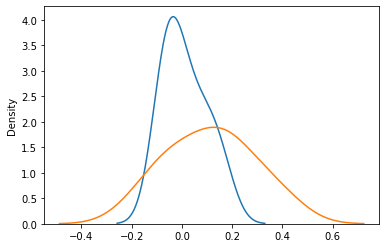

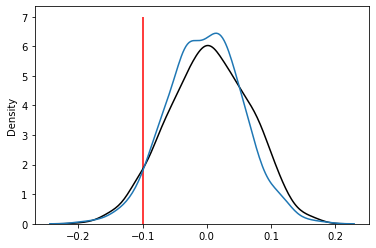

In [20]:
da_1 = np.random.normal(0, 0.1, size=10)
da_2 = np.random.normal(0.1, 0.2, size=10)
bs = Bootstrap(da_1, da_2)
print(bs.permutation_test(size=1000), ttest_ind(da_1, da_2)[1], bs.two_sample_test(size=1000))

sns.kdeplot(da_1)
sns.kdeplot(da_2)
plt.figure()
g = da_1.mean() - da_2.mean()
k = bs.bs_permutation_diff_
h = bs.bs_two_sample_diff_
sns.kdeplot(k, color='black')
sns.kdeplot(h)
plt.vlines(g, 0, plt.yticks()[0][-1], color='red')

In [ ]:
ttest_1samp()